In [2]:
using BenchmarkTools, LinearAlgebra, Plots, Base.Threads

const N = 200_000::Int64
const J = (100::Int64,200::Int64)
const Box_x = (0.0::Float64,1.0::Float64,0.0::Float64,1.0::Float64)
order = 5
const corder = Val(order)
include("../aux_functions/aux_functions.jl")

@show nthreads()

dx = differentials(Box_x,J)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

par_grid = (N, J, Box_x, order)

S = [0.0::Float64 for l in 1:2, i in 1:J[1], j in 1:J[2]]
#S_new  = [0.0::Float64 for i in 1:J[1], j in 1:J[2], l in 1:2]
TS = zeros(Float64,(2,J...,nthreads()))

par_current_threads_S = (par_grid, TS)



u_r = Float64[]
for i in 1:N
    u1 = Box_x[2] * rand()
    u2 = Box_x[4] * rand()
    u3 = (1.0 - 2.0 * rand())
    u4 = (1.0 - 2.0 * rand())
    append!(u_r, [u1, u2, u3, u4])
    #@show u_r
end

par_dis = deepcopy(u_r)

get_current_threads_2D!(par_dis, S, par_current_threads_S)
#S_new = get_current_2D_trans(corder, N, J, Box_x, par_dis)

@show sum(S[1,:,:])
#@show sum(S_new[:,:,1])

#@btime get_current_2D_trans(corder, $N, $J, $Box, $u)

nthreads() = 2


sum(S[1, :, :]) = 0.0010591999206979509


0.0010591999206979509

In [11]:
@show norm(S[1,:,:] - S_new[:,:,1])/norm(S[1,:,:])

norm(S[1, :, :] - S_new[:, :, 1]) / norm(S[1, :, :]) = 2.2973592795844805e-16


2.2973592795844805e-16

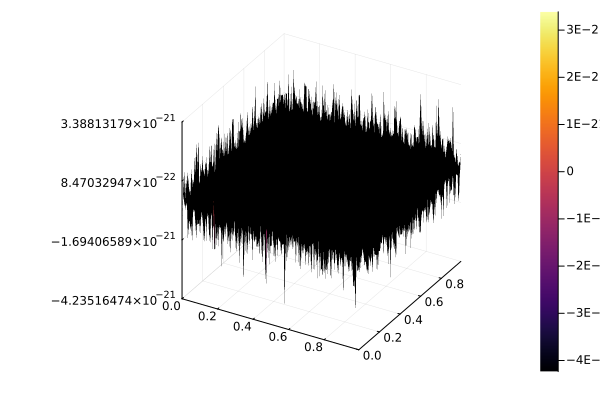

In [12]:
surface(y_p,x_p, S[1,:,:] - S_new[:,:,1])

In [5]:
my_current = Current2DTrans(N, J)

Current2DTrans(200000, (100, 200), [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1 1; 1 1; … ; 1 1; 1 1], [0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0], [0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0])

In [6]:
my_S = my_current(corder, Box_x, par_dis);

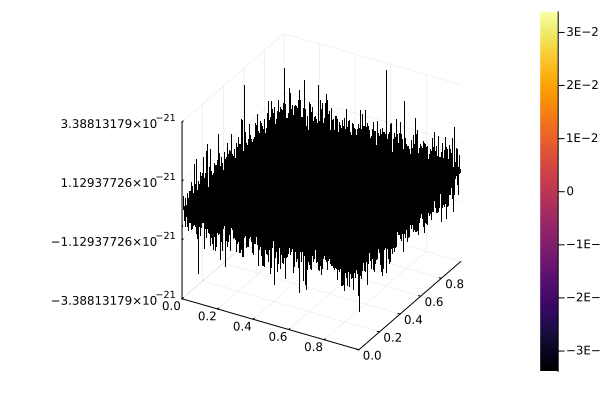

In [7]:
surface(y_p,x_p, my_S[:,:,1] - S[1,:,:])


## Density check

In [10]:
const N = 200_000::Int64
const J = (100::Int64,200::Int64)
const Box_x = (0.0::Float64,1.0::Float64,0.0::Float64,1.0::Float64)
order = 5
const corder = Val(order)
include("../aux_functions/aux_functions.jl")

@show nthreads()

dx = differentials(Box_x,J)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

par_grid = (N, Box_x, J, order)






u_r = Float64[]
for i in 1:N
    u1 = Box_x[2] * rand()
    u2 = Box_x[4] * rand()
    u3 = (1.0 - 2.0 * rand())
    u4 = (1.0 - 2.0 * rand())
    append!(u_r, [u1, u2, u3, u4])
    #@show u_r
end

par_dis = deepcopy(u_r)

n = zeros(J)

get_density_2D!(par_dis, n, par_grid)

get_density_2D_trans = Density2DTrans(N, J)
n_new = get_density_2D_trans(Val(order), Box_x, par_dis)

nthreads() = 2


100×200 Matrix{Float64}:
 1.10054   1.40077   1.1763    0.9033    …  1.11338   1.28124   1.30874
 0.891806  1.04665   0.895195  0.739604     1.03657   1.01021   0.961233
 0.969023  1.05501   0.955304  0.702364     0.975568  0.892849  0.867962
 1.06786   1.25285   1.05188   0.732031     0.996497  1.01727   0.942487
 1.08457   1.13819   0.982882  0.835235     0.925387  0.968907  0.97393
 1.15784   1.01608   0.899886  0.922687  …  0.913045  0.927394  0.990981
 0.877631  0.845073  1.02368   0.984272     0.94839   1.20234   1.08204
 0.868588  0.928867  1.17962   1.05582      1.16826   1.39307   1.09644
 1.00199   1.04889   1.12735   1.07661      1.11719   1.12572   0.892953
 1.08143   0.894275  0.844395  1.07561      1.14377   0.992218  0.944516
 ⋮                                       ⋱                      
 0.934355  0.888265  0.946408  1.10037      0.950509  0.947802  0.92728
 0.918742  0.851071  0.867778  0.996959     0.995585  1.152     1.02962
 0.817615  0.85664   0.852609  0.860455 

In [11]:
norm(n-n_new)/norm(n)

4.478166893995325e-16

In [12]:
sum(n_new)/prod(J)

1.0